# Trabalho 1 - Esteganofrafia
## Nícolas Hecker Silva, 186132


# Carregando e mostrando uma imagem 

O primeiro passo para a execução do programa é carregar as bibliotecas que serão utilizadas (não se preocupe se elas não faz sentido agora, elas serão explicadas ao longo do notebook). Após isso, é necessário carregar uma imagem para ver se conseguimos visualizá-la.	

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Para carregar as imagens, usaremos a biblioteca OpenCV, que é uma biblioteca de visão computacional. Porém, para mostrar as imagens no notebook, usaremos a biblioteca matplotlib, uma vez que a biblioteca OpenCV não é capaz de mostrar imagens no notebook. Há também uma peculiaridade na forma como o OpenCV carrega as imagens, que é o fato de ele carregar no formato BGR, enquanto o matplotlib espera que as imagens estejam no formato RGB. Por isso, é necessário fazer a conversão de BGR para RGB antes de mostrar a imagem com matplotlib. No caso, para facilitar a compreensão, nesse notebook as imagens sempre serão carregadas e logo em seguida transformadas para o formato RGB.

A imagem baboon.png foi carregada com sucesso tem dimensões (512, 512, 3) e tipo uint8
Os 3 primeiros pixels da primeira linha são: 
[[164 150  71]
 [ 63  57  31]
 [ 75  43  10]]
Mostrando o pixel no nariz: 
[213 164 186]
Mostrando ela:


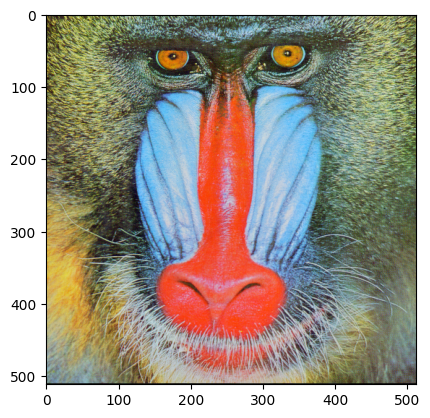

In [2]:
# Carrega a imagem baboon.png da pasta "imgs" como RGB e mostra o vetor numpy correspondente
baboom = cv2.imread('imgs/baboon.png')[:,:,::-1]
print(f"A imagem baboon.png foi carregada com sucesso tem dimensões {baboom.shape} e tipo {baboom.dtype}")
print(f"Os 3 primeiros pixels da primeira linha são: \n{baboom[0,0:3]}")
print(f"Mostrando o pixel no nariz: \n{baboom[200,250]}")
print("Mostrando ela:")

plt.imshow(baboom)
plt.show()


Acima podemos ver a imagem do baboom colorida. Foi plotado também eixos para indicar a posição dos pixels e lembrar que a imagem é uma matriz. Próximo a região 200,250 podemos ver o nariz vermelho do babuíno, e plotando o valor do pixel nessa região, podemos ver que o valor é [213 164 186], ou seja, 213 para vermelho, 164 para verde e 186 para azul. Como há muito mais vermelho que as outras cores, esse se trata de um pixel vermelho.

Podemos agora separar os canais de cores da imagem, para ver como cada um se comporta. Em cima temos os canais de cores em suas respectivas cores, enquanto embaixo temos os mesmos valores mas mostrados em escala de cinza. É criado 3 imagens e em cada um é zerado os valores dos outros canais, para que possamos ver como cada canal se comporta.

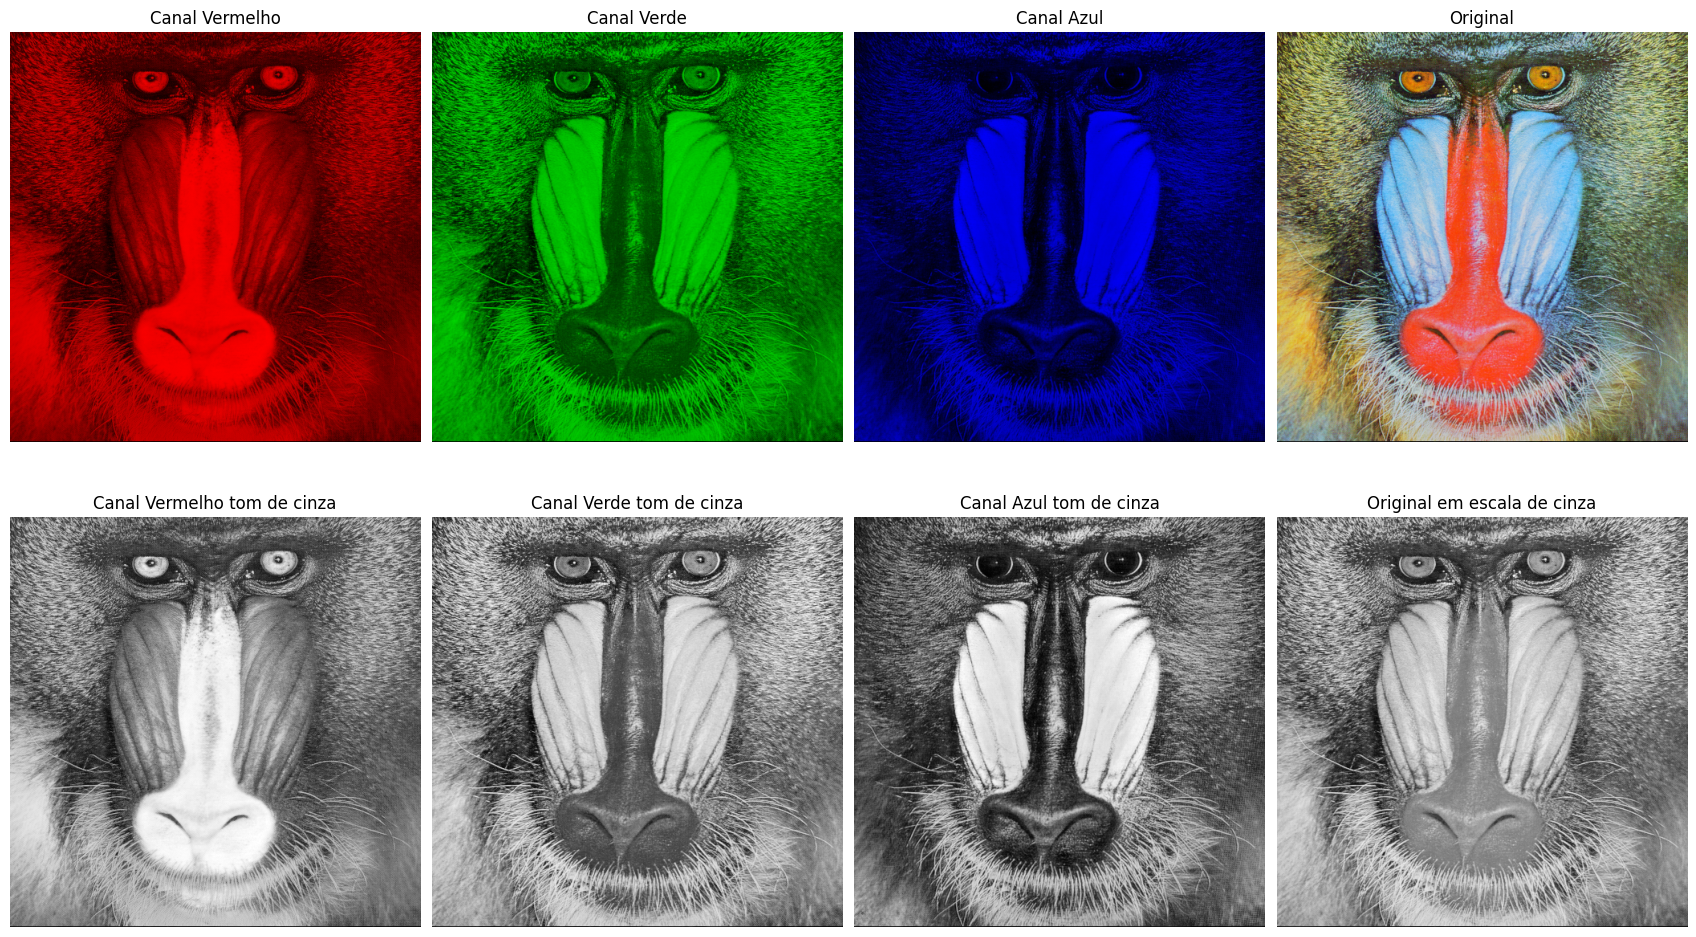

In [3]:
baboomRed = baboom.copy()
baboomRed[:,:,(1,2)] = 0
baboomVerde = baboom.copy()
baboomVerde[:,:,(0,2)] = 0
baboomAzul = baboom.copy()
baboomAzul[:,:,(0,1)] = 0
baboomCinza = cv2.cvtColor(baboom, cv2.COLOR_RGB2GRAY)


fig, axs = plt.subplots(2,4, figsize=(15,5))
axs[0][0].imshow(baboomRed)
axs[0][0].set_title("Canal Vermelho")
axs[0][1].imshow(baboomVerde)
axs[0][1].set_title("Canal Verde")
axs[0][2].imshow(baboomAzul)
axs[0][2].set_title("Canal Azul")
axs[1][0].imshow(baboomRed[:,:,0], cmap='gray')
axs[1][0].set_title("Canal Vermelho tom de cinza")
axs[1][1].imshow(baboomVerde[:,:,1], cmap='gray')
axs[1][1].set_title("Canal Verde tom de cinza")
axs[1][2].imshow(baboomAzul[:,:,2], cmap='gray')
axs[1][2].set_title("Canal Azul tom de cinza")
axs[0][3].imshow(baboom)
axs[0][3].set_title("Original")
axs[1][3].imshow(baboomCinza, cmap='gray')
axs[1][3].set_title("Original em escala de cinza")

#remove eixos
for ax in axs.flatten():
    ax.axis('off')

# aumenta a distancia vertical
plt.tight_layout()
# seta o tamanho do plot para 1000x1000
fig.set_size_inches(18, 10)
plt.show()

É interessante notar que os pontos mais fortes (brancos na imagem em tons de cinza) do canal vermelho estão no nariz e um pouco na barba, uma vez que o nariz é muito vermelho e a barba é amarela, que é uma mistura de vermelho e verde. Já o canal verde tem pontos fortes em quase toda a imagem com excessão do nariz e de regiões escuras do macaco. Isso acontece pois o nariz é uma cor vermelha mais pura, o preto não possui cores, e o restante do macao é amarelo (mistura vermelho e verde), ciano (azul e verde) e branco (vermelho, verde e azul). Por fim, o canal azul tem pontos fortes nas laterais do nariz, pois elas são ciano, que é uma mistura de azul e verde e pouquíssimos no nariz que é muito vermelho. Nos pontos brancos como nos pelos sobre os lábios, todos os canais de cores estçao fortes, enquanto nos pontos pretos, todos os canais estão fracos.

Agora vamos alterar alguns pixels e salvar novamente a imagem

# Alterando a imagem

O desafio aqui é transformar a imagem de forma que ela não possua mais tons de verde

Para facilitar a exibicao das imagens, sera criada uma funcao para mostrar diretamente elas, de forma a omitir a complexidade dos parametros do matplotlib. Também será criada uma função para mostrar varias imagens juntas.

In [4]:
def mostrar(imagens: list, titulos=[], cmaps=[], eixos = False):
    if type(imagens) == list:
        if type(imagens[0]) == list:
            fig, axs = plt.subplots(len(imagens), len(imagens[0]), figsize=(5*len(imagens[0]), 5*len(imagens)))
            for i in range(len(imagens)):
                for j in range(len(imagens[i])):
                    imagem = imagens[i][j]
                    if cmaps[i][j]:
                        axs[i][j].imshow(imagem, cmap=cmaps[i][j])
                    else:
                        axs[i][j].imshow(imagem)
                    if titulos[i][j]:
                        axs[i][j].set_title(titulos[i][j])
                    if not eixos:
                        axs[i][j].axis("off")
        else:
            fig, axs = plt.subplots(1, len(imagens), figsize=(20, 20))
            for i, imagem in enumerate(imagens):
                if cmaps:
                    axs[i].imshow(imagem, cmap=cmaps[i])
                else:
                    axs[i].imshow(imagem)
                if titulos:
                    axs[i].set_title(titulos[i])
                if not eixos:
                    axs[i].axis("off")
        #diminui distancia lateral
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
    else:
        if type(cmaps) != list:
            plt.imshow(imagens, cmap=cmaps)
        else:
            plt.imshow(imagens)
        if type(titulos) != list:
            plt.title(titulos)
        if not eixos:
            plt.axis("off")
    plt.show()
    

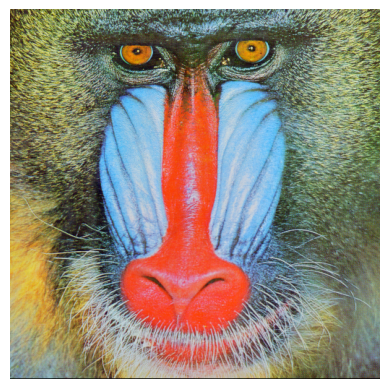

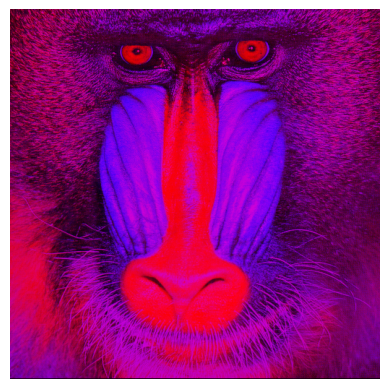

In [5]:
# abre a imagem baboon.png
baboon = cv2.imread('imgs/baboon.png')[:, :, ::-1]

# mostra a imagem com plt
mostrar(baboon)

# Remove o canal vermelho

baboon_sem_verde = baboon.copy()
baboon_sem_verde[:, :, 1] = 0

# salva a imagem sem o canal vermelho
cv2.imwrite('imgs_produzidas/baboon_sem_verde.png', baboon_sem_verde[:, :, ::-1])
new_baboon_sem_verde = cv2.imread('imgs_produzidas/baboon_sem_verde.png')[:, :, ::-1]
mostrar(new_baboon_sem_verde)



Aqui é curioso perceber como o babuíno ficou alterado pela transformação. Os pontos no nariz ficaram muito vermelhos enquanto os pontos ao lado do nariz (a partir de agora chamado de bochechas), estão muito azuis quase arroxeados. Isso aconteceu pois o verde presente em cada um deles tonava a imagem mais clara, com tons de branco. Na ausencia dele, os tons do nariz e bochecha ficaram muito mais constrastantes. Os tons que anteriormente eram brancos estão agora com tons de rosa / magenta, pois é a união de vermelho e azul

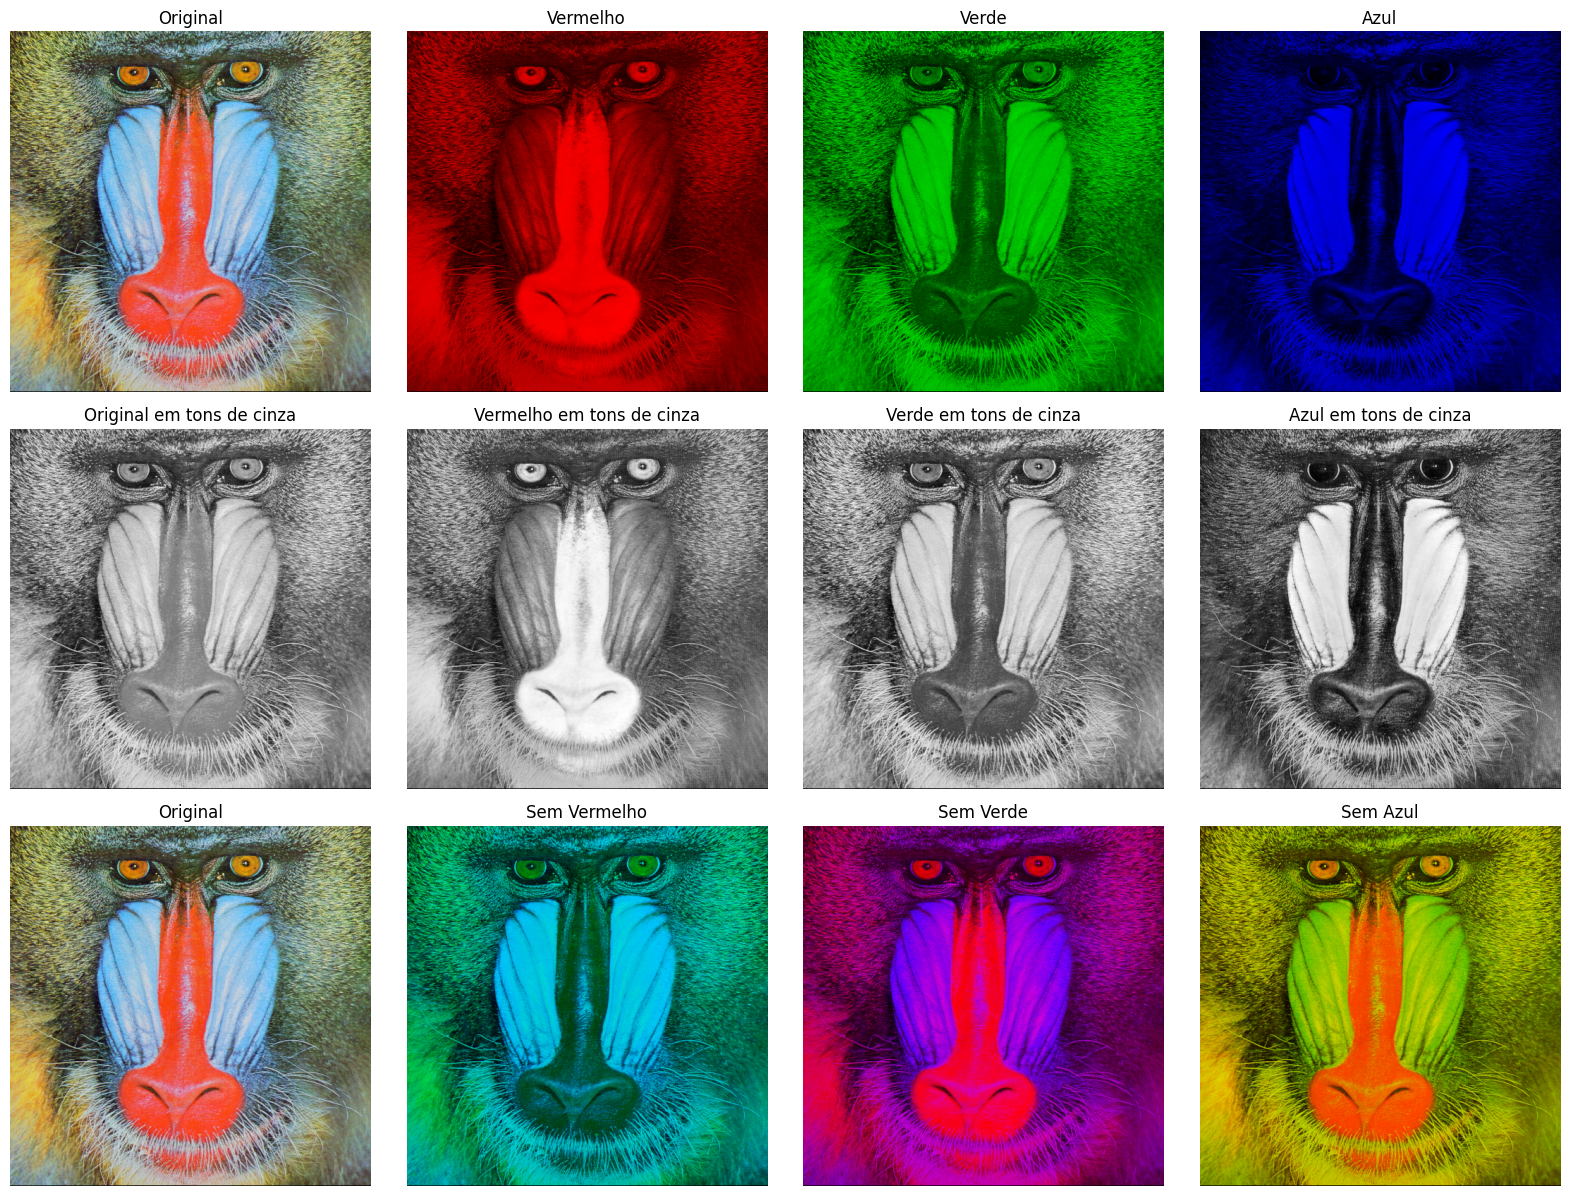

In [6]:
baboon_vermelho = baboon.copy()
baboon_vermelho[:, :, (1,2)] = 0
baboon_verde = baboon.copy()
baboon_verde[:, :, (0,2)] = 0
baboon_azul = baboon.copy()
baboon_azul[:, :, (0,1)] = 0

baboon_sem_vermelho = baboon.copy()
baboon_sem_vermelho[:, :, 0] = 0
baboon_sem_verde = baboon.copy()
baboon_sem_verde[:, :, 1] = 0
baboon_sem_azul = baboon.copy()
baboon_sem_azul[:, :, 2] = 0

imagens = []
imagens.append([baboon, baboon_vermelho, baboon_verde, baboon_azul])
# cria baboon em escala de cinza
baboon_gray = cv2.cvtColor(baboon, cv2.COLOR_RGB2GRAY)
imagens.append([baboon_gray, baboon_vermelho[:,:,0], baboon_verde[:,:,1], baboon_azul[:,:,2]])
imagens.append([baboon, baboon_sem_vermelho, baboon_sem_verde, baboon_sem_azul])

titulos = [['Original', 'Vermelho', 'Verde', 'Azul'], ['Original em tons de cinza', 'Vermelho em tons de cinza', 'Verde em tons de cinza', 'Azul em tons de cinza'], ['Original', 'Sem Vermelho', 'Sem Verde', 'Sem Azul']]
cmps = [[None, None, None, None], ['gray', 'gray', 'gray', 'gray'], [None, None, None, None]]
mostrar(imagens, titulos, cmps)



Agora que sabemos alterar e salvar uma imagem, vamos codificar a nossa entrada em binarios para poder esconder as informações nos pixels.

# Codificando

## Texo em binário

A forma mais simples de codificar a mensagem é apenas transformar os caracteres em números e posteriormente em sequência de binários. Para contemplar o maior número possível de caracteres, podemos utilizar ao invés do UTF-8, o Unicode nativo do python que utiliza 4 bytes: Para isso podemos fazer assim:

In [7]:
caracter = 'a'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = 'A'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = '!'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = '#'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = 'á'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = 'Á'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
caracter = '👍'
print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))} e em hexadecimal como {hex(ord(caracter))}')
caracter = '🇧🇷'
try :
    print(f'O caracter {caracter} tem o valor {ord(caracter)} e pode ser expresso em binário de 4 bytes como {bin(ord(caracter))}')
except Exception as e:
    print(f'Erro: o caracter {caracter} não pode ser convertido pois {e}')
print(f"O maior caracter disponível é {chr(0x10FFFF)}")
try:
    print(f"O maior caracter disponível é {chr(0x110000)}")
except Exception as e:
    print(f"Erro: o caracter chr(0x110000) não pode ser convertido pois {e}")

O caracter a tem o valor 97 e pode ser expresso em binário de 4 bytes como 0b1100001
O caracter A tem o valor 65 e pode ser expresso em binário de 4 bytes como 0b1000001
O caracter ! tem o valor 33 e pode ser expresso em binário de 4 bytes como 0b100001
O caracter # tem o valor 35 e pode ser expresso em binário de 4 bytes como 0b100011
O caracter á tem o valor 225 e pode ser expresso em binário de 4 bytes como 0b11100001
O caracter Á tem o valor 193 e pode ser expresso em binário de 4 bytes como 0b11000001
O caracter 👍 tem o valor 128077 e pode ser expresso em binário de 4 bytes como 0b11111010001001101 e em hexadecimal como 0x1f44d
Erro: o caracter 🇧🇷 não pode ser convertido pois ord() expected a character, but string of length 2 found
O maior caracter disponível é 􏿿
Erro: o caracter chr(0x110000) não pode ser convertido pois chr() arg not in range(0x110000)


Assim podemos verificar que precisamos de 3 bytes para representar qualquer caracter em unicode. Dessa forma podemos codificar os bits para uma mensagem simples: "Oi". ###### Explicacao do funcionamento

In [8]:
mensagem = "Oi"

# Cria um vetor numpy com capacidade para 3 * 8 * len(mensagem) bits
mensagem_binaria = np.zeros(3 * 8 * len(mensagem), dtype=bool)
print(f"O vetor mensagem_binaria tem {len(mensagem_binaria)} bits")
print(f"vetor antes da mensagem: {mensagem_binaria}")
# Converte a mensagem para binário
pos = 0
for c in mensagem:
    # Converte o caracter para binário
    c_bin = ord(c)
    mascara = 0x800000 # 1000 0000 0000 0000 0000 0000, coleta apenas o bit mais significativo
    for i in range(24):
        mensagem_binaria[pos] = (c_bin & mascara)>0
        c_bin = c_bin << 1
        pos += 1
print(f"vetor depois da mensagem: {mensagem_binaria}")

O vetor mensagem_binaria tem 48 bits
vetor antes da mensagem: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
vetor depois da mensagem: [False False False False False False False False False False False False
 False False False False False  True False False  True  True  True  True
 False False False False False False False False False False False False
 False False False False False  True  True False  True False False  True]


Agora para garantir que a função funciona, precisamos extrarir a mensagem da codificacao: ##### Explicar como

In [9]:
mensagem_extraida = ""
for i in range(0, len(mensagem_binaria), 24):
    c_bin = 0
    for j in range(24):
        c_bin = c_bin << 1
        c_bin += mensagem_binaria[i+j]
    mensagem_extraida += chr(c_bin)
print(f"Mensagem extraída: {mensagem_extraida}")

Mensagem extraída: Oi


Assim conseguimos transformar uma mensagem em uma cadeia de caracteres numpy e uma cadeia de caracteres numpy em uma mensagem novamente. Para facilitar o trabalho futuro, será criado uma função para executar essas tarefas:

In [22]:
def codifica_mensagem(mensagem: str):
    # Cria um vetor numpy com capacidade para 3 * 8 * len(mensagem) bits
    mensagem_binaria = np.zeros(3 * 8 * len(mensagem), dtype=bool)
    pos = 0
    for c in mensagem:
        # Converte o caracter para binário
        c_bin = ord(c)
        mascara = 0x800000 # 1000 0000 0000 0000 0000 0000, coleta apenas o bit mais significativo
        for i in range(24):
            mensagem_binaria[pos] = (c_bin & mascara)>0
            c_bin = c_bin << 1
            pos += 1
    return mensagem_binaria

def decodifica_mensagem(mensagem_binaria):
    assert len(mensagem_binaria) % 24 == 0, "O vetor de bits não é múltiplo de 24"
    mensagem_extraida = ""
    for i in range(0, len(mensagem_binaria), 24):
        c_bin = 0
        for j in range(24):
            c_bin = c_bin << 1
            c_bin += mensagem_binaria[i+j]
        mensagem_extraida += chr(c_bin)
    return mensagem_extraida

Agora testamos essa função para garantir que toda informação passada é recebida

In [11]:
vetor = codifica_mensagem("Olá mundo! Eu estou aqui 😱😱😱 para ensinar 👨‍🏫 a falar coreano ( ͡° ͜ʖ ͡°): 소통할 수 있어요! ou chines: 我可以溝通！")
print(f"formato do vetor extraído: {vetor.shape}")
print(f"Mensagem extraída: {decodifica_mensagem(vetor)}")

formato do vetor extraído: (2472,)
Mensagem extraída: Olá mundo! Eu estou aqui 😱😱😱 para ensinar 👨‍🏫 a falar coreano ( ͡° ͜ʖ ͡°): 소통할 수 있어요! ou chines: 我可以溝通！


## Inserindo binário na imagem

Agora, para modificar a imagem de forma a guardar os bits nela, será necessário alterar os canais de cores ao mesmo tempo. Uma boa forma de fazer isso é transformando a imagem (tridimensional) em unidimensional, depois somar e voltar para o formato inicial. #### Explicar

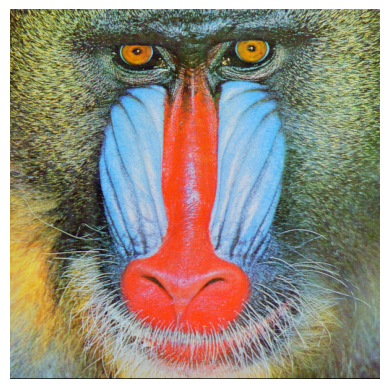

In [12]:
def insere_vetor(imagem: np.ndarray, vetor: np.ndarray):
    formato_inicial = imagem.shape
    imagem_flattened = imagem.flatten()
    imagem_flattened[:len(vetor)]>>=1
    imagem_flattened[:len(vetor)]<<=1 
    imagem_flattened[:len(vetor)] |= vetor
    return imagem_flattened.reshape(formato_inicial)

baboon_mensagem = insere_vetor(baboon, vetor)
tamanho_mensagem = len(vetor)
mostrar(baboon_mensagem)

Agora precisamos extrair a mensagem da imagem do baboom para garantir que a mensagem foi inserida corretamente:

In [13]:
def extrai_vetor(imagem: np.ndarray, tamanho: int):
    imagem_flattened = imagem.flatten()[:tamanho]
    imagem_flattened &= 1
    return imagem_flattened

vetor_escondido = extrai_vetor(baboon_mensagem, tamanho_mensagem)
print(f"Mensagem extraída: {decodifica_mensagem(vetor_escondido)}")

Mensagem extraída: Olá mundo! Eu estou aqui 😱😱😱 para ensinar 👨‍🏫 a falar coreano ( ͡° ͜ʖ ͡°): 소통할 수 있어요! ou chines: 我可以溝通！


## Problemas

Há, porém algumas limitações desse método: É necessário saber o tamanho da mensagem na imagem; É necessário saber que há uma mensagem na imagem. Pensando do ponto de vista de transmissão da mensagem para algum outro interlocutor, ou o número de bit da mensagem seria previamente combinado, ou todas as mensagens deveriam ter o mesmo tamanho, o que não é uma boa abordagem para enviar mensagens gigantes ou mensagens minúsculas. Vamos ver o que aconteceria se errássemos o tamanho da mensagem:

Vamos receber a mensagem que está codificada e receber exatamente 216 bits, um valor que é múltiplo de 24 uma vez que o leitor sabe o método de como o sistema é implementado e, portanto sabe que cada caracter deve ser codificado como 2 bits.

In [14]:
vetor_escondido = extrai_vetor(baboon_mensagem, 216)
print(f"Mensagem extraída: {decodifica_mensagem(vetor_escondido)}")

Mensagem extraída: Olá mundo


Podemos verificar que apenas os 9 primeiros caracteres foram lidos, o leitor nunca saberia que o interlocutor que ensinar coreano. Mas um cenário ainda pior ocorre se a mensagem não for múltipla de 24: (testemos 217):

In [24]:
vetor_escondido = extrai_vetor(baboon_mensagem, 212)
try:  
    print(f"Mensagem extraída: {decodifica_mensagem(vetor_escondido)}")
except Exception as e:
    print(f"Erro: {e}")

Erro: O vetor de bits não é múltiplo de 24


Um erro ocorre, pois a mensagem não é múltipla de 24. Isso é necessário pois durante a função de decodificação, um índice avança 24 posições. Se os bits acabam, ocorre um acesso a um indice que não existe no vetor. Pior ainda se darmos um valor múltiplo de 24, mas maior que a mensagem:

In [29]:
vetor_escondido = extrai_vetor(baboon_mensagem, tamanho_mensagem+24)
try:
    print(f"Mensagem extraída: {decodifica_mensagem(vetor_escondido)}")
except Exception as e:
    print(f"Erro: {e}")

Mensagem extraída: Olá mundo! Eu estou aqui 😱😱😱 para ensinar 👨‍🏫 a falar coreano ( ͡° ͜ʖ ͡°): 소통할 수 있어요! ou chines: 我可以溝通！󭹍


Aqui o código não acusa erro, mas a mensagem resultante contém informações não passadas. Se aumentarmos a mensagem apenas para um novo caracter obtemos:

In [31]:
vetor_escondido = extrai_vetor(baboon_mensagem, tamanho_mensagem+24*2)
try:
    print(f"Mensagem extraída: {decodifica_mensagem(vetor_escondido)}")
except Exception as e:
    print(f"Erro: {e}")

Erro: chr() arg not in range(0x110000)


Aqui o código tenta transformar uma informação que transcende o limite superior dos caracteres. Dessa forma um erro é causado e o caracter escolhido não pode ser traduzido.

Algo semelhante ocorre se tentarmos obter informação de uma imagem que não possui mensagem:

In [34]:
vetor_escondido = extrai_vetor(baboon, 24)
try:
    print(f"Mensagem extraída: {decodifica_mensagem(vetor_escondido)}")
except Exception as e:
    print(f"Erro: {e}")

Erro: chr() arg not in range(0x110000)


Aqui tentamos ler uma mensagem da imagem original e nem mesmo foi possível ler um único caracter.

Assim vemos a necessidade da utilização de um padrão para verificar a existência de mensagens nas imagens e obtermos também o tamanho exato da mensagem.

# Cabeçalho

Como forma de verificar a existência de mensagens nas imagens aleatórias e obtermos também o tamanho exato da mensagem, vamor criar um cabeçalho com um código de verificação (assinatura) e uma variavel inteira de tamanho limitado para definir o tamanho da mensagem. Além disso, será armazenado nele também o canal de bits a utilizar para inserir a mensagem.

## Assinatura
Uma boa assinatura deve carregar informações suficientes para verificar a existência de uma mensagem, mas não ser tão grande a ponto de ocupar muito espaço na imagem. É possível criar códigos como sequencias de bits puras, mas aqui vamos usar uma palavra que acaracterize também o seu criador 😉. A assinatura utilizada será: "NHS🐙" Ela carrega as iniciais do criador e um emoji que refresenta a camuflagem (não há emojis de camaleão 😢 então terá que ser o polvo), contém uma quantidade de caracteres suficiente para ser (praticamente) impossível ter sido gerada aleatóriamente. O emoji também garante que outros leitores de esteganografia não possam encontrar as mensagens codificadas dessa forma.

## Tamanho

Para guardar o tamanho da mensagem, será utilizado um inteiro de 32 bits. Isso garante que a mensagem possa ter até 4.294.967.296 caracteres na mensagem, o que é um número muito grande para qualquer mensagem. Além disso, o tamanho da mensagem é um número que pode ser facilmente verificado, uma vez que é um número inteiro.

## Canal de bits

Para difinir quais bits devem ser alterados, será utilizado um inteiro de 8 bits. A posicao do bit define se aquele canal de cores deve ser utilizado na codificao da mensagem. Por exemplo, se o canal de bits for 0b00000001, apenas os bits menos significativos de todos os canais de cores serão utilizados. Se o canal de bits for 0b00000011, os dois bits menos significativos de todos os canais de cores serão utilizados. Se o canal de bits for 0b00000101, o canal 2 e o canal 0 serão utilizados, mas o 1 não. E assim por diante.

## Implementação

In [37]:
def cabecalho(tamanho_msg, canal_bits: list):
    assinatura = "NHS🐙"
    assinatura_bin = codifica_mensagem(assinatura)
    tamanho_bin = np.zeros(32, dtype=bool)
    for i in range(32):
        tamanho_bin[i] = (tamanho_msg & (1 << i)) > 0
    canal_bits_bin = np.zeros(8, dtype=bool) # 1010 0000 usa o primeiro e o terceiro bit
    for i in range(8):
        canal_bits_bin[i] = (i in canal_bits)
    return np.concatenate((assinatura_bin, tamanho_bin, canal_bits_bin))

cabecalho_vetor = cabecalho(24, [0, 2]).astype(int)
print(f"Assinatura: {cabecalho_vetor[:24*4]}")
print(f"Tamanho da mensagem: {cabecalho_vetor[24*4:24*4+32]}")
print(f"Bits: {cabecalho_vetor[24*4+32:]}")
    

Assinatura: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
Tamanho da mensagem: [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Bits: [1 0 1 0 0 0 0 0]


# Completando a codificação e decodificação com cabeçalho